In [35]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from clean import PCBCCleaner, DrawPointAssayCleaner, DrawPointCoordCleaner

# import plotter

output_dir = "../outputs/grade_analysis_compare_dp_pcbc/"
SAVE = True

plt.rcParams.update(
    {
        'font.size': 18
    }
)

# Data Input and Cleaning

In [3]:
pcbc_df = PCBCCleaner.get_processed_data()
assay_df = DrawPointAssayCleaner.get_processed_data()
dp_coords = DrawPointCoordCleaner.get_processed_data()

# Grouping

### PCBC

In [4]:
pcbc_df

,dhid,date,weight,CU,AU
0,P08-04W,2021-02-01,1.000000,0.445853,0.473962
1,P08-04W,2021-04-01,7.185358,0.445853,0.473962
2,P08-04W,2021-06-01,90.465466,0.445853,0.473962
3,P08-04W,2021-08-01,24.556073,0.445853,0.473962
4,P08-04W,2022-01-01,2247.061308,0.529466,0.554649
...,...,...,...,...,...
13209,P26-12E,2022-09-01,638.270199,0.632717,0.543535
13210,P26-12E,2022-10-01,1362.954562,0.711671,0.608383
13211,P26-13E,2022-09-01,1.000000,0.277313,0.319020
13212,P26-13E,2022-10-01,1878.426579,0.369132,0.375707


In [5]:
dhids = list(pcbc_df['dhid'].unique())

In [6]:
pcbc_groups = {}

for dhid in dhids:
    filtered_pcbc_df = pcbc_df.query('dhid == @dhid')
    pcbc_groups[dhid] = {}
    
    try:
        pcbc_groups[dhid] = filtered_pcbc_df
    except:
        print(f'Invalid data for {dhid}')

### DP Assay

In [7]:
assay_groups = {}

for dhid in dhids:
    filtered_assay_df = assay_df.query('dhid == @dhid')
    assay_groups[dhid] = {}
    
    try:
        assay_groups[dhid] = filtered_assay_df
    except:
        print(f'Invalid data for {dhid}')

In [8]:
# assay_dhids = list(assay_df['dhid'].unique())
# assay_groups = {}

# for dhid in assay_dhids:
#     filtered_assay_df = assay_df.query('dhid == @dhid')
#     try:
#         group = {
#             'weight': filtered_assay_df['weight'],
#             'cu': filtered_assay_df['CU'],
#             'au': filtered_assay_df['AU']
#         }
#         if len(group['weight']) > 3:
#             assay_groups[dhid] = group
#     except:
#         print(f'Invalid data for {dhid}')

In [9]:
assay_groups['P20-10E']

,SAMPLEID,dhid,date,Oritype,BarcodeNo,Tons_Sampling,weight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
150,P20-10E_20201006,P20-10E,2020-10-06,O,U010191,NaN,27.575,2.45,2.23,10.40,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
345,P20-10E_20201017,P20-10E,2020-10-17,O,U010396,NaN,30.035,2.87,0.87,11.97,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
598,P20-10E_20201026,P20-10E,2020-10-26,O,U010687,NaN,32.485,2.70,2.51,8.90,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
794,P20-10E_20201106,P20-10E,2020-11-06,O,U010949,NaN,24.330,2.14,1.28,8.51,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
833,P20-10E_20201108,P20-10E,2020-11-08,O,U010996,NaN,29.025,3.13,1.97,9.49,0.01,0.01,NaN,0.10,10.89,1.70,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,P20-10E_20220913,P20-10E,2022-09-13,O,U032673,1595.714848,32.204,0.43,0.40,2.20,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
20536,P20-10E_20220923,P20-10E,2022-09-23,O,U033109,1661.302720,24.206,0.04,0.04,1.43,0.02,0.06,NaN,NaN,NaN,NaN,NaN,NaN,Manual
21084,P20-10E_20221004,P20-10E,2022-10-04,O,U033683,1327.999316,26.953,0.08,0.03,1.27,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
21439,P20-10E_20221011,P20-10E,2022-10-11,O,U034000,672.738290,27.597,0.41,0.48,2.96,0.00,0.09,NaN,NaN,NaN,NaN,NaN,NaN,Manual


In [10]:
df = assay_df.dropna(subset=['CU','AG', 'PB', 'ZN'])
df

,SAMPLEID,dhid,date,Oritype,BarcodeNo,Tons_Sampling,weight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
0,P14-10W_20201002,P14-10W,2020-10-02,O,U010007,NaN,28.335,1.48,0.72,4.25,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
1,P14-11E_20201002,P14-11E,2020-10-02,O,U010008,NaN,29.650,1.09,1.29,3.99,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
2,P14-11W_20201002,P14-11W,2020-10-02,O,U010009,NaN,31.135,2.73,1.61,9.87,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
3,P14-12W_20201002,P14-12W,2020-10-02,O,U010011,NaN,30.450,2.55,1.45,6.05,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
4,P14-13W_20201002,P14-13W,2020-10-02,O,U010012,NaN,32.710,3.70,2.39,12.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,P23-14E_20221030,P23-14E,2022-10-30,O,U035047,1374.649920,26.414,0.33,0.48,3.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22377,P24-02E_20221030,P24-02E,2022-10-30,O,U035048,638.551200,30.239,1.98,1.29,42.00,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22378,P25-10W_20221030,P25-10W,2022-10-30,O,U035049,910.884073,26.490,0.51,0.56,3.23,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22379,P25-11W_20221030,P25-11W,2022-10-30,O,U035050,1443.214367,26.995,0.46,0.44,2.36,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual


In [27]:
df = assay_df.dropna(subset=['CU','AG', 'PB', 'ZN', 'F', 'C', 'S'])

x = df[['CU','AG', 'PB', 'ZN', 'F', 'C', 'S']]
y = df['AU']
 
# with sklearn
regr = LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
print(model.pvalues)

Intercept: 
 0.12170921643835819
Coefficients: 
 [ 5.25050924e-01  3.17275280e-03  1.69069180e+00 -3.35250543e-01
 -1.49287651e-05 -1.98371363e-02  5.92777351e-02]
                            OLS Regression Results                            
Dep. Variable:                     AU   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     52.17
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.26e-59
Time:                        04:15:22   Log-Likelihood:                -846.70
No. Observations:                 679   AIC:                             1709.
Df Residuals:                     671   BIC:                             1746.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

In [25]:
df = assay_df.dropna(subset=['CU','AU'])

x = df[['CU']]
y = df['AU']
 
# with sklearn
regr = LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.3361983056080168
Coefficients: 
 [0.58599302]
                            OLS Regression Results                            
Dep. Variable:                     AU   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     8483.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:11:15   Log-Likelihood:                -31451.
No. Observations:               22378   AIC:                         6.291e+04
Df Residuals:                   22376   BIC:                         6.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

# Outputs

### Functions

In [17]:
def calculated_linear_regression_parameters(X, y, w):
    # create linear regression model
    model = LinearRegression()

    # fit regression model
    model.fit(X, y, w)
    r_squared = model.score(X, y, w)
    m, b = model.coef_[0], model.intercept_
    
    return m, b, r_squared

def plot_au_vs_cu(ax, w, x, y, dhid=None, min_s=2, max_s=298, alpha=1):
    min_w = min(w)
    max_w = max(w)
    cmap = plt.colormaps.get('copper')
    norm = colors.Normalize(vmin=min_w, vmax=max_w)

    s = (min_s + max_s * norm(w))

    # Graph
    ax.scatter(x, y, c=cmap(norm(w)), s=s, alpha=alpha)

    ax.set_xlim(0)
    ax.set_ylim(0)

    ax.set_xlabel('CU grade (%)')
    ax.set_ylabel('AU grade (ppm)') 

In [6]:
pcbc_lr_params = {}
assay_lr_params = {}

In [28]:
for dhid, group in pcbc_groups.items():
    print(dhid)
    w, x, y = group['weight'], group['cu'], group['au']
    X = [[i] for i in x]
    
    m, b, r_squared = calculated_linear_regression_parameters(X, y, w)
    pcbc_lr_params[dhid] = {
        'r2': r_squared,
        'm': m,
        'b': b
    }

P08-04W
P08-05W
P08-06W
P08-07W
P08-08W
P09-03W
P09-04E
P09-04W
P09-05E
P09-05W
P09-06E
P09-06W
P09-07E
P09-07W
P09-08E
P09-08W
P09-09W
P09-10W
P10-03E
P10-03W
P10-04E
P10-04W
P10-05E
P10-05W
P10-06E
P10-06W
P10-07E
P10-07W
P10-08E
P10-08W
P10-09E
P10-09W
P10-10E
P10-10W
P11-03E
P11-03W
P11-04E
P11-04W
P11-05E
P11-05W
P11-06E
P11-06W
P11-07E
P11-07W
P11-08E
P11-08W
P11-09E
P11-09W
P11-10E
P11-10W
P11-11W
P11-12W
P11-13W
P12-03E
P12-03W
P12-04E
P12-04W
P12-05E
P12-05W
P12-06E
P12-06W
P12-07E
P12-07W
P12-08E
P12-08W
P12-09E
P12-09W
P12-10E
P12-10W
P12-11E
P12-11W
P12-12E
P12-12W
P12-13E
P12-13W
P13-03E
P13-03W
P13-04E
P13-04W
P13-05E
P13-05W
P13-06E
P13-06W
P13-07E
P13-07W
P13-08E
P13-08W
P13-09E
P13-09W
P13-10E
P13-10W
P13-11E
P13-11W
P13-12E
P13-12W
P13-13E
P13-13W
P13-14W
P14-03E
P14-03W
P14-04E
P14-04W
P14-05E
P14-05W
P14-06E
P14-06W
P14-07E
P14-07W
P14-08E
P14-08W
P14-09E
P14-09W
P14-10E
P14-10W
P14-11E
P14-11W
P14-12E
P14-12W
P14-13E
P14-13W
P14-14E
P14-14W
P15-03E
P15-03W
P15-04E


In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

# Iterate over each drillhole
for dhid in pcbc_dhids:
    w, x, y = pcbc_groups[dhid]
    
    m, b, r_squared = calculated_linear_regression_parameters(x, y, w)
    pcbc_lr_params[dhid] = {
        'r2': r_squared,
        'm': m,
        'b': b
    }
    
    ax.cla()
    plot_au_vs_cu(ax, w, x, y, dhid=dhid)
    
    ax.set_title(f'{dhid}_AU_vs_CU_R2={r_squared:.2f}')
    ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')
    ax.legend()
    
    if SAVE:
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'{dhid}_PCBC_R2={r_squared:.2f}.svg', format='svg')


# TODO: do not perform linear regression on drawpoints with fewer than 3 values
# TODO: compare PCBC and Assay linear regressions

In [33]:
## Testing
dhid = 'P08-04W'
group = pcbc_groups[dhid]
w, x, y = group['weight'], group['cu'], group['au']

X = [[i] for i in x]
m, b, r_squared = calculated_linear_regression_parameters(X, y, w)
pcbc_lr_params[dhid] = {
    'r2': r_squared,
    'm': m,
    'b': b
}
pcbc_lr_params['P08-04W']

{'r2': 0.5172634945746492, 'm': 1.3437805552238338, 'b': -0.7624937062555237}

# Regression

## PCBC

### Data Prep

In [158]:
df = pcbc_df.copy()
df.sample(5)

,dhid,date,weight,CU,AU
490,P10-07W,2020-10-01,970.833002,0.966841,0.764826
9092,P19-06W,2022-05-01,3571.305078,1.058496,0.940981
7,P08-04W,2022-04-01,3943.006711,0.710566,1.093613
12640,P23-10E,2021-10-01,10011.227027,0.698972,0.835730
836,P11-06E,2021-11-01,10758.860954,2.299891,2.369814


In [159]:
# prepare the data
drop_cols = []

df.drop(drop_cols, axis=1, inplace=True)
# df = df[['date', 'CU', 'AU']] # For CU only
df.dropna(inplace=True)

df['x'] = [dp_coords.loc[dp].x for dp in df['dhid']]
df['y'] = [dp_coords.loc[dp].y for dp in df['dhid']]
df['z'] = [dp_coords.loc[dp].z for dp in df['dhid']]
df.drop('dhid', axis=1, inplace=True)


# epoch time
from datetime import datetime
epoch_time = datetime(1970, 1, 1)
df['seconds'] = [(date - epoch_time).total_seconds() for date in df['date']]
df.drop('date', axis=1, inplace=True)

In [160]:
# Train/test split
GOLD_COL = "AU"
cutoff = df.seconds.quantile(0.8)

df['is_train'] = [1 if s < cutoff else 0 for s in df['seconds']]

train, test = df.query('is_train == 1').drop('seconds', axis=1), df.query('is_train == 0').drop('seconds', axis=1)
train.drop('is_train', axis=1, inplace=True)
test.drop('is_train', axis=1, inplace=True)

X_train, y_train = train.drop(GOLD_COL, axis=1), train[GOLD_COL]
X_test, y_test = test.drop(GOLD_COL, axis=1), test[GOLD_COL]

### Model

In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [162]:
y_pred = model.predict(X_test)

In [163]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.31664473570785356
0.17121554084414117
0.41378199676175037
0.13907084637941425


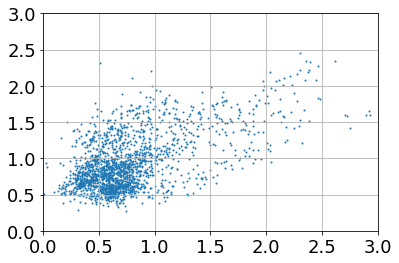

In [164]:
fig = plt.figure()

ax = fig.subplots()
ax.scatter(y_test, y_pred, s=1)
ax.set_ylim([0, 3])
ax.set_xlim([0, 3])
ax.grid()

### Test

In [93]:
df = assay_df

In [94]:
X, y = df['CU'].to_frame(), df['AU']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [95]:
print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

0.5209909902769099
0.9733819197903285
0.9866011959197741
0.2748948115244466


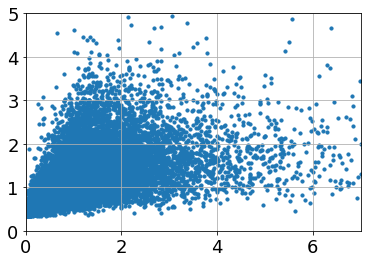

In [58]:
fig = plt.figure()

ax = fig.subplots()
ax.scatter(y, y_pred, s=10)
ax.set_ylim([0, 5])
ax.set_xlim([0, 7])
ax.grid()

## Assay

### Data Prep

In [221]:
df = assay_df.copy()

In [222]:
# prepare the data
# drop_cols = ['SAMPLEID', 'Oritype', 'Tons_Sampling', 'BarcodeNo', 'F', 'C', 'S', 'SULFIDE', 'CNV', 'MPA', 'SamplingType',
#              'weight', 'PB', 'ZN']
# df = df[['date', 'CU', 'AU', 'AG', 'PB', 'ZN', 'F', 'C', 'S']]
df = df[['date', 'CU', 'AU', 'AG', 'PB', 'ZN']]
# df.drop(drop_cols, axis=1, inplace=True)
# df = df[['date', 'CU', 'AU']] # For CU only
df.dropna(inplace=True)
print(len(df))

# df['x'] = [dp_coords.loc[dp].x for dp in df['dhid']]
# df['y'] = [dp_coords.loc[dp].y for dp in df['dhid']]
# df['z'] = [dp_coords.loc[dp].z for dp in df['dhid']]
# df.drop('dhid', axis=1, inplace=True)

# epoch time
from datetime import datetime
epoch_time = datetime(1970, 1, 1)
df['seconds'] = [(date - epoch_time).total_seconds() for date in df['date']]
df.drop('date', axis=1, inplace=True)

22349


In [223]:
# Train/test split
GOLD_COL = "AU"
cutoff = df.seconds.quantile(0.8)

df['is_train'] = [1 if s < cutoff else 0 for s in df['seconds']]

train, test = df.query('is_train == 1').drop('seconds', axis=1), df.query('is_train == 0').drop('seconds', axis=1)
train.drop('is_train', axis=1, inplace=True)
test.drop('is_train', axis=1, inplace=True)

X_train, y_train = train.drop(GOLD_COL, axis=1), train[GOLD_COL]
X_test, y_test = test.drop(GOLD_COL, axis=1), test[GOLD_COL]

### Model

In [206]:
# df.dropna(inplace=True)
# X_train, y_train = df[['CU', 'AG', 'PB', 'ZN']], df[['AU']]
# X_test, y_test = X_train, y_train

In [224]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [225]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.44678493120710455
0.6126499678409421
0.7827195972000075
0.2847711637173541


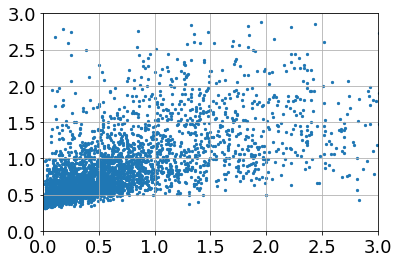

In [226]:
fig = plt.figure()

ax = fig.subplots()
ax.scatter(y_test, y_pred, s=5)
ax.set_ylim([0, 3])
ax.set_xlim([0, 3])
ax.grid()

### Test

In [104]:
X, y = df['CU'].to_frame(), df['AU']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [106]:
print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

0.5209909902769099
0.9733819197903285
0.9866011959197741
0.2748948115244466


# Classification

## Assay

In [143]:
df = assay_df.copy()

In [144]:
df = df[['date', 'CU', 'AU']] # For CU only
df.dropna(inplace=True)

# epoch time
from datetime import datetime
epoch_time = datetime(1970, 1, 1)
df['seconds'] = [(date - epoch_time).total_seconds() for date in df['date']]
df.drop('date', axis=1, inplace=True)

In [145]:
ORE_CUTOFF = 0.77
df['is_ore'] = df['AU'] >= ORE_CUTOFF

# df.drop('AU', axis=1, inplace=True)

In [146]:
# Train/test split
cutoff = df.seconds.quantile(0.8)

df['is_train'] = [1 if s < cutoff else 0 for s in df['seconds']]

train, test = df.query('is_train == 1').drop('seconds', axis=1), df.query('is_train == 0').drop('seconds', axis=1)

y_actual = test['AU'].copy()
# df.drop('AU', axis=1, inplace=True)
train.drop(['is_train', 'AU'], axis=1, inplace=True)
test.drop(['is_train', 'AU'], axis=1, inplace=True)

GOLD_COL = "is_ore"
X_train, y_train = train.drop(GOLD_COL, axis=1), train[GOLD_COL]
X_test, y_test = test.drop(GOLD_COL, axis=1), test[GOLD_COL]

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [157]:
pd.Series(y_actual).describe()

count    4480.000000
mean        0.697056
std         0.935045
min         0.000000
25%         0.170000
50%         0.430000
75%         0.822500
max        14.850000
Name: AU, dtype: float64

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8479910714285714
0.7514018691588785
0.6595570139458573
0.7024901703800787


In [149]:
X_test

,CU
17899,0.41
17900,0.87
17901,1.80
17902,0.95
17903,1.38
...,...
22376,0.33
22377,1.98
22378,0.51
22379,0.46


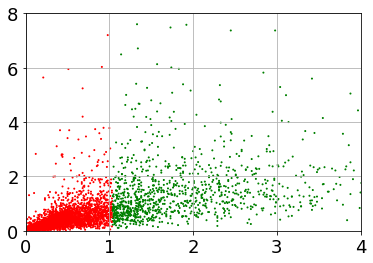

In [154]:
fig = plt.figure()

ax = fig.subplots()
ax.scatter(X_test['CU'], y_actual, s=1, c=['g' if pred == True else 'r' for pred in y_pred])
ax.set_ylim([0, 8])
ax.set_xlim([0, 4])
ax.grid()